Accuracy: 0.6951219512195121

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79       412
           1       0.70      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.70      0.62      0.61       656
weighted avg       0.70      0.70      0.66       656



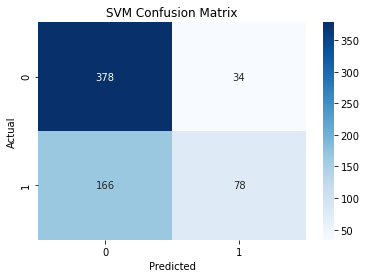

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset 
df = pd.read_csv('water_potability.csv')  

# Step 2: Handle missing values (fill numeric columns with mean)
df = df.fillna(df.mean(numeric_only=True))

# Step 3: Split data into features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # You can change kernel to 'linear', 'poly', etc.
svm_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions on test set
y_pred = svm_model.predict(X_test_scaled)

# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix Visualization
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
